In [1]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 7.1 MB/s 
     |████████████████████████████████| 619 kB 55.7 MB/s 
     |████████████████████████████████| 47.6 MB 2.4 MB/s 
     |████████████████████████████████| 145 kB 52.7 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [2]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import os
import pandas as pd

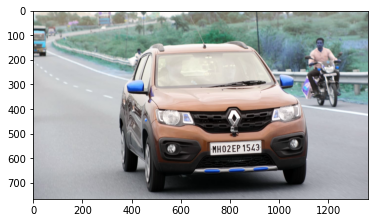

In [136]:
image = cv2.imread('/content/170707-Neidermeyer-india-car-tease_z6ld4i.jpg')
plt.imshow(image)

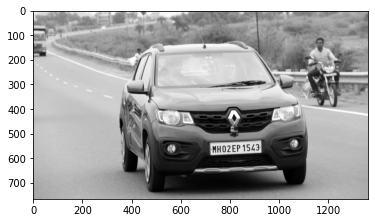

In [137]:
img = cv2.imread('/content/170707-Neidermeyer-india-car-tease_z6ld4i.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

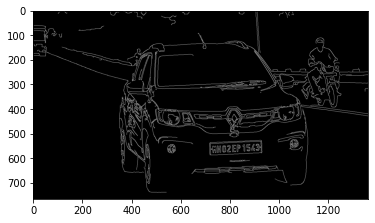

In [138]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200) 
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [139]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [140]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [141]:
location

array([[[927, 532]],

       [[720, 541]],

       [[722, 587]],

       [[926, 578]]], dtype=int32)

In [142]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

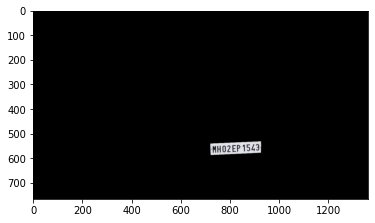

In [143]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [144]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

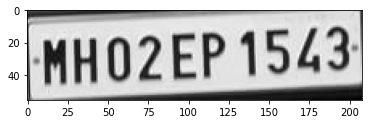

In [145]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [146]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 4], [208, 4], [208, 55], [0, 55]], 'MHOZEP 1543', 0.924117548299884)]

In [147]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)

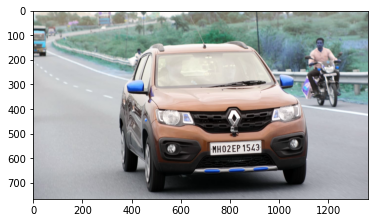

In [148]:
plt.imshow(image)

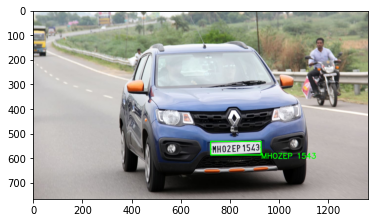

In [149]:
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

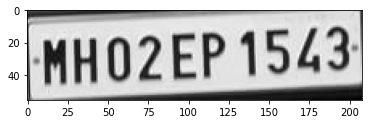

In [151]:
number = plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))